In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

%matplotlib inline
plt.style.use('bmh')

path = Path.cwd().parent / "mdsb-2023"

In [102]:
data = pd.read_parquet(path / "train.parquet")
ext = pd.read_csv(path / "external_data.csv")

data["site_id"] = data["site_id"].astype("category")

In [104]:
def show_data_summary(data):
    # Display the dimensions of the dataset
    print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

    # Display the column names in the dataset
    print("\nColumns in the dataset:", data.columns.tolist())

    # Display summary statistics for numerical columns
    print("\nSummary statistics:")
    display(data.describe())

    # Display the total number of null values in the dataset
    print(f"\nThe number of null values is:  {data.isnull().sum().sum()}.")
    
    if data.isnull().sum().sum()>0:
        print(f"\nSummary of null values per column:\n{data.isnull().sum()}")

    # Display n of unique values for each categorical column
    for c in data.select_dtypes(include=["category"]).columns:
        n_unique_values = data[c].nunique()
        print(f"\nNumber of unique values in variable '{c}':\n{n_unique_values}")

    # Display data types of each column in the dataset
    print(f"\nThe current dtypes of the columns are the followings:\n{data.dtypes}")

    # Display the count of numerical and categorical columns
    print(
        f"\nThus we have {len(data.select_dtypes(include=np.number).columns)} numerical columns "
        f"and {len(set(data.columns) - set(data.select_dtypes(include=np.number).columns))} non numerical columns."
    )

# EDA

In [105]:
data.sample(3)

counter_id                       counter_name    site_id  \
406288  100049407-353255860  152 boulevard du Montparnasse E-O  100049407   
339749  100047547-104047547           6 rue Julia Bartet NE-SO  100047547   
803974  100057380-104057380           Totem Cours la Reine E-O  100057380   

                            site_name  bike_count                date  \
406288  152 boulevard du Montparnasse         9.0 2021-03-26 23:00:00   
339749             6 rue Julia Bartet        35.0 2021-05-25 09:00:00   
803974           Totem Cours la Reine        71.0 2021-07-07 11:00:00   

       counter_installation_date         coordinates counter_technical_id  \
406288                2018-12-07  48.840801,2.333233          Y2H19070373   
339749                2018-11-28    48.82636,2.30303          Y2H18086323   
803974                2020-02-11    48.86462,2.31444          YTH19111509   

         latitude  longitude  log_bike_count  
406288  48.840801   2.333233        2.302585  
339749  48.826360   2.303030        3.583519  
803974  48.864620   2.314440        4.276666

In [106]:
ext.sample(3)

numer_sta                 date    pmer  tend  cod_tend   dd   ff  \
2027       7149  2020-11-21 21:00:00  103180   -70         8  230  2.2   
1587       7149  2021-09-27 00:00:00  101630   -60         7  200  2.9   
1808       7149  2021-06-24 15:00:00  102140   -50         7  330  2.5   

           t      td   u  ...  hnuage1  nnuage2  ctype2  hnuage2  nnuage3  \
2027  278.05  276.25  88  ...   6800.0      NaN     NaN      NaN      NaN   
1587  288.95  288.45  97  ...    210.0      6.0     NaN   1680.0      6.0   
1808  292.75  282.65  52  ...   1400.0      6.0     6.0   1680.0      NaN   

      ctype3  hnuage3  nnuage4  ctype4  hnuage4  
2027     NaN      NaN      NaN     NaN      NaN  
1587     NaN   2100.0      NaN     NaN      NaN  
1808     NaN      NaN      NaN     NaN      NaN  

[3 rows x 59 columns]

In [30]:
show_data_summary(data)

The dataset has 496827 rows and 12 columns.

Columns in the dataset: ['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count', 'date', 'counter_installation_date', 'coordinates', 'counter_technical_id', 'latitude', 'longitude', 'log_bike_count']

Summary statistics:


bike_count       latitude      longitude  log_bike_count
count  496827.000000  496827.000000  496827.000000   496827.000000
mean       60.191475      48.854343       2.345479        3.079917
std        87.590566       0.018554       0.038026        1.659899
min         0.000000      48.826360       2.265420        0.000000
25%         5.000000      48.840801       2.314440        1.791759
50%        29.000000      48.852090       2.353870        3.401197
75%        79.000000      48.864610       2.375870        4.382027
max      1302.000000      48.891720       2.409690        7.172425


The number of null values is:  0.

Number of unique values in variable 'counter_id':
56

Number of unique values in variable 'counter_name':
56

Number of unique values in variable 'site_id':
30

Number of unique values in variable 'site_name':
30

Number of unique values in variable 'coordinates':
30

Number of unique values in variable 'counter_technical_id':
30

The types of the columns are the followings:
counter_id                         category
counter_name                       category
site_id                            category
site_name                          category
bike_count                          float64
date                         datetime64[ns]
counter_installation_date    datetime64[ns]
coordinates                        category
counter_technical_id               category
latitude                            float64
longitude                           float64
log_bike_count                      float64
dtype: object

Thus we have 4 numerical columns and 8 non 

In [31]:
show_data_summary(ext)

The dataset has 3322 rows and 59 columns.

Columns in the dataset: ['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1', 'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1', 'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3', 'nnuage4', 'ctype4', 'hnuage4']

Summary statistics:


numer_sta           pmer         tend     cod_tend           dd  \
count     3322.0    3322.000000  3322.000000  3322.000000  3322.000000   
mean      7149.0  101682.886815    -0.237809     4.273028   184.379892   
std          0.0     923.888170   122.191314     2.713199   103.708084   
min       7149.0   97260.000000  -750.000000     0.000000     0.000000   
25%       7149.0  101200.000000   -70.000000     2.000000    80.000000   
50%       7149.0  101820.000000     0.000000     3.000000   200.000000   
75%       7149.0  102287.500000    70.000000     7.000000   260.000000   
max       7149.0  103920.000000   720.000000     8.000000   360.000000   

                ff            t           td            u            vv  ...  \
count  3322.000000  3322.000000  3322.000000  3322.000000   3322.000000  ...   
mean      3.654154   285.877905   281.006442    74.775135  20142.338952  ...   
std       2.000353     6.851700     5.634409    17.022427  10283.556918  ...   
min       0.000000   267.650000   260.750000    24.000000    120.000000  ...   
25%       2.200000   280.950000   276.950000    63.000000  12710.000000  ...   
50%       3.400000   285.850000   281.450000    79.000000  20000.000000  ...   
75%       4.900000   290.650000   285.550000    89.000000  25000.000000  ...   
max      14.600000   307.450000   293.150000   100.000000  60000.000000  ...   

           hnuage1      nnuage2       ctype2      hnuage2     nnuage3  \
count  2867.000000  1695.000000  1443.000000  1695.000000  618.000000   
mean   2028.674573     5.030678     4.515593  2692.943953    5.441748   
std    2377.241533     2.003304     2.463098  2309.340104    2.017108   
min       0.000000     1.000000     0.000000    60.000000    1.000000   
25%     500.000000     3.000000     3.000000  1080.000000    4.250000   
50%    1080.000000     5.000000     6.000000  1800.000000    6.000000   
75%    2100.000000     7.000000     6.000000  3400.000000    7.000000   
max    9000.000000     8.000000     9.000000  9000.000000    8.000000   

           ctype3      hnuage3    nnuage4     ctype4      hnuage4  
count  470.000000   618.000000  42.000000  87.000000    42.000000  
mean     3.961702  3310.695793   3.476190   6.735632  3205.000000  
std      3.042454  2423.703985   2.360633   3.196873  2595.553656  
min      0.000000   300.000000   1.000000   0.000000   360.000000  
25%      0.000000  1400.000000   1.000000   6.000000  1112.500000  
50%      3.000000  2430.000000   2.500000   8.000000  2150.000000  
75%      6.000000  5000.000000   5.750000   9.000000  5800.000000  
max      9.000000  9000.000000   7.000000   9.000000  8000.000000  

[8 rows x 58 columns]


The number of null values is:  71572.
Summary of null values per column:
numer_sta       0
date            0
pmer            0
tend            0
cod_tend        0
dd              0
ff              0
t               0
td              0
u               0
vv              0
ww              0
w1              7
w2             10
n             156
nbas            5
hbas          453
cl            413
cm           1381
ch           1644
pres            0
niv_bar      3322
geop         3322
tend24         10
tn12         2492
tn24         3322
tx12         2492
tx24         3322
tminsol      3321
sw           3322
tw           3322
raf10          10
rafper          0
per             0
etat_sol       52
ht_neige       49
ssfrai        445
perssfrai     445
rr1             9
rr3             6
rr6            16
rr12           22
rr24           24
phenspe1     3322
phenspe2     3322
phenspe3     3322
phenspe4     3322
nnuage1       449
ctype1        798
hnuage1       455
nnuage2      1627
ctype2  

# Visual

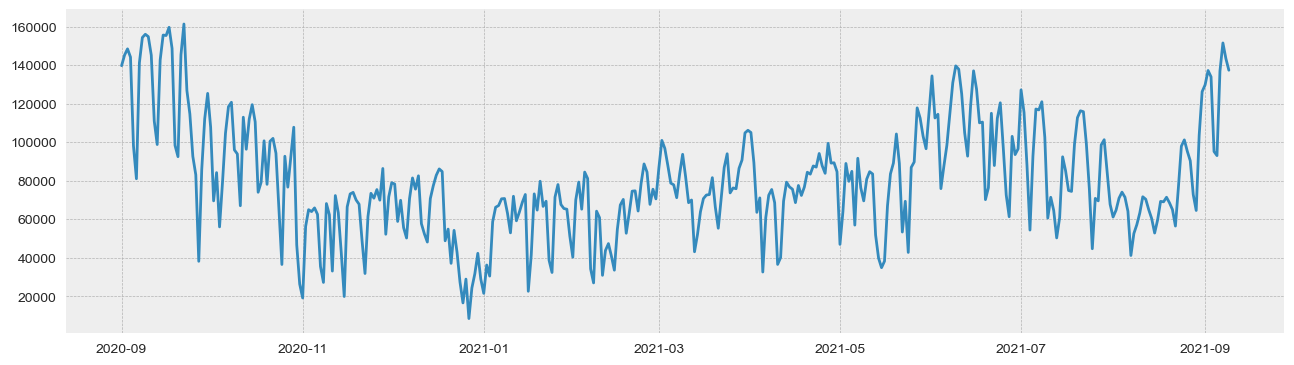

In [107]:
start_date = pd.to_datetime("2020/09/01")
end_date = pd.to_datetime("2021/09/10")

mask = (
    (data["date"] >= start_date)
    & (data["date"] <= end_date)
)

grouped_data = data.loc[mask].groupby(pd.Grouper(freq="1d", key="date"))[["bike_count"]].sum()

plt.figure(figsize=(14, 4))  

plt.plot(grouped_data)

plt.show()

Now we plot the historical data for each counter

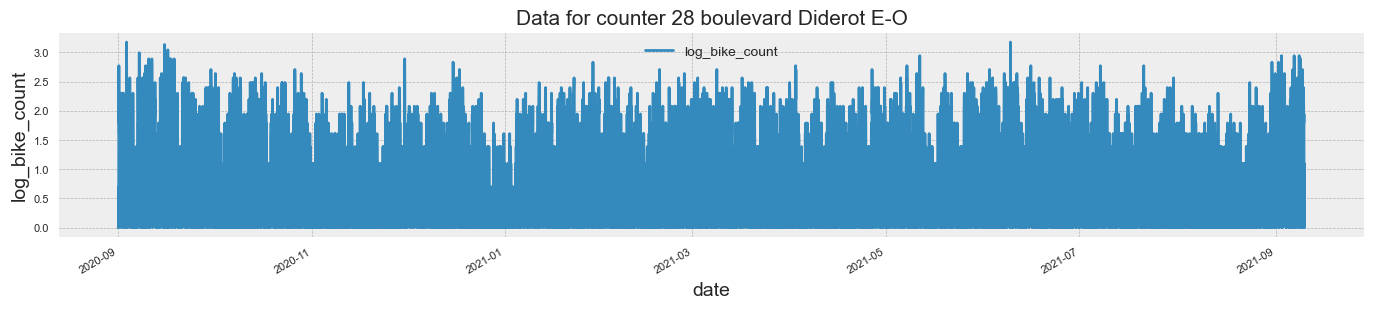

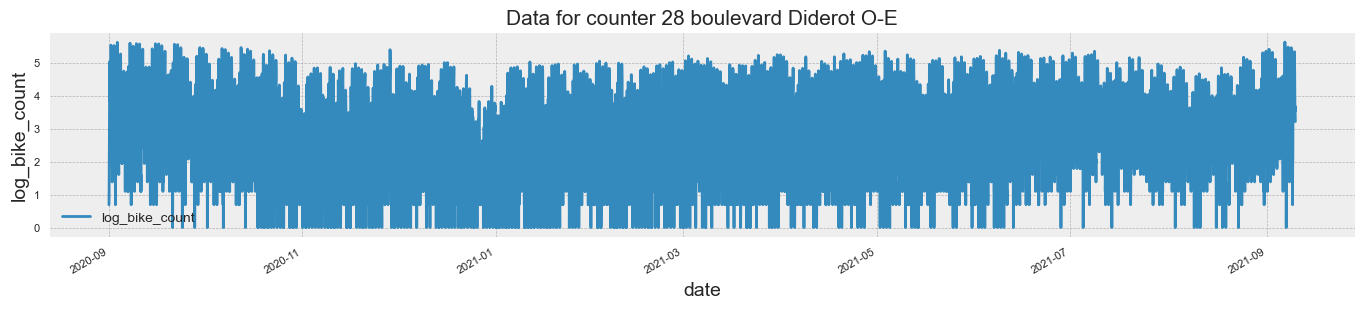

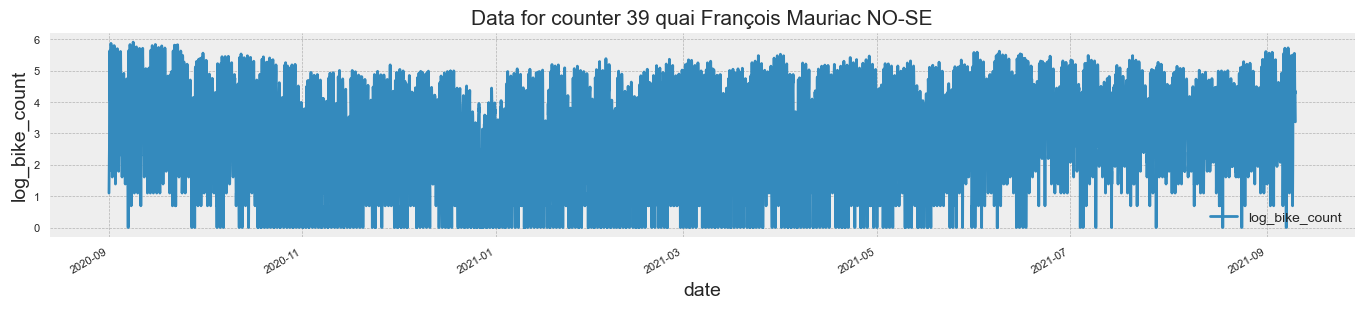

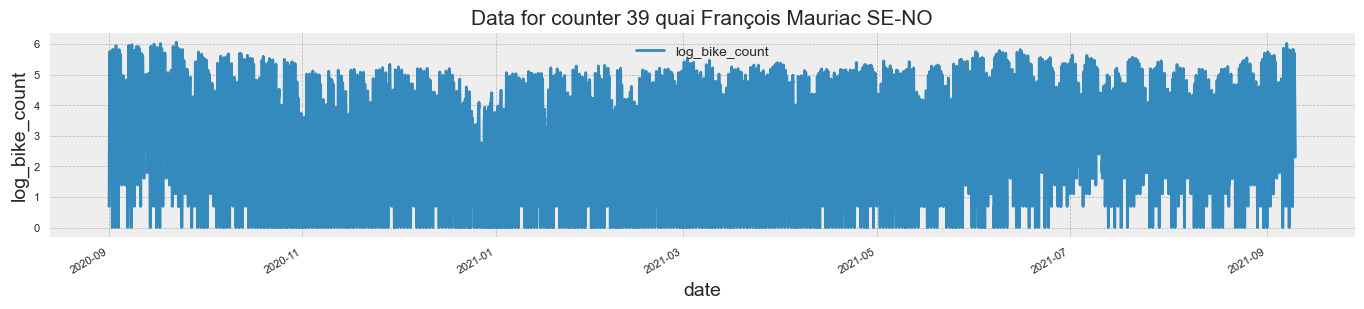

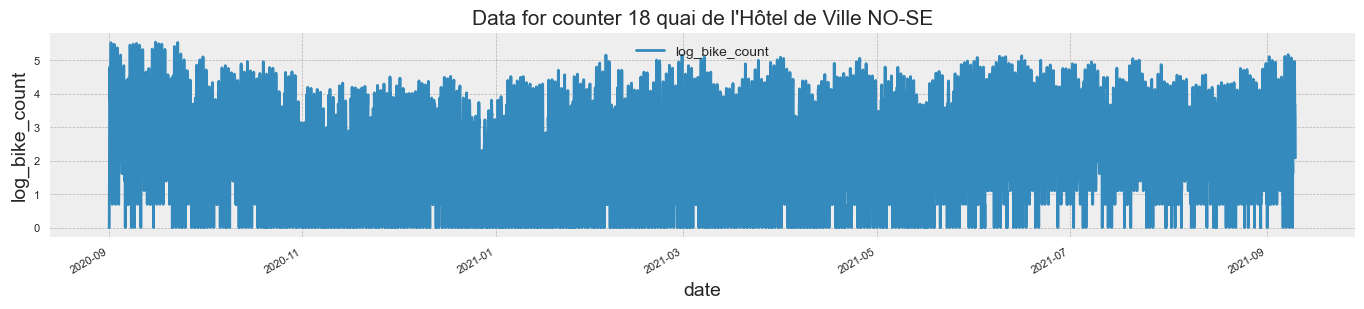

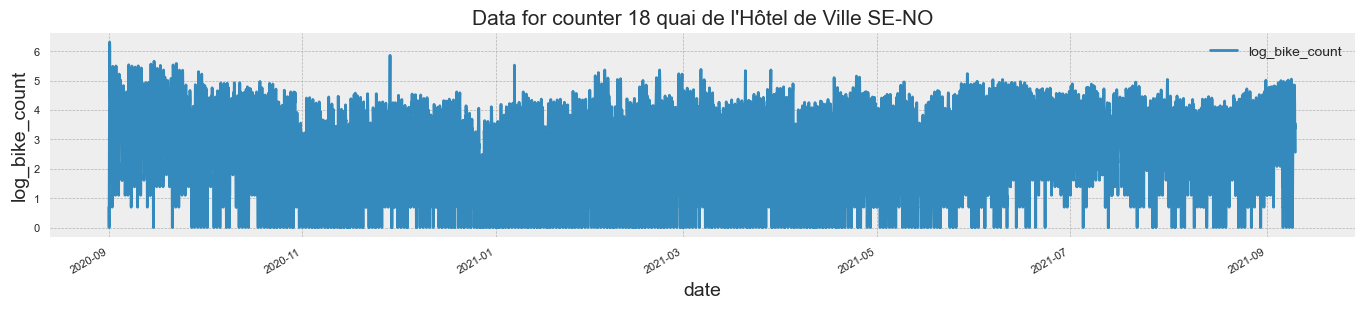

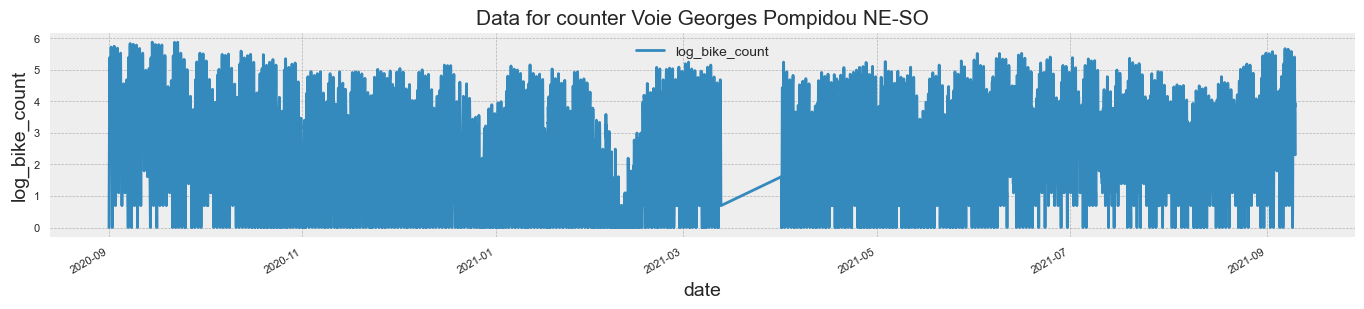

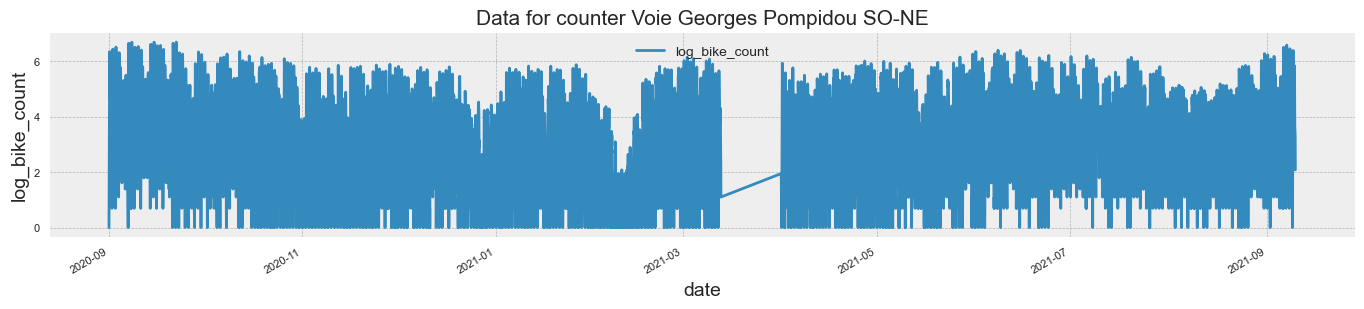

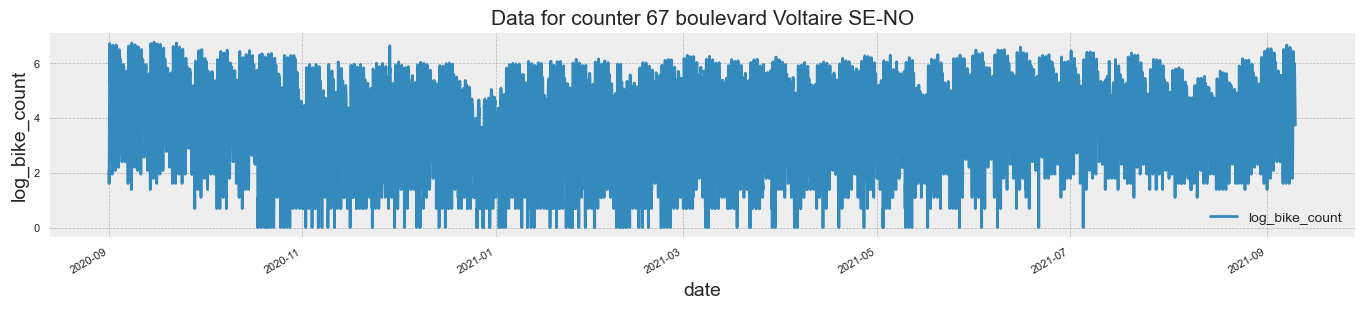

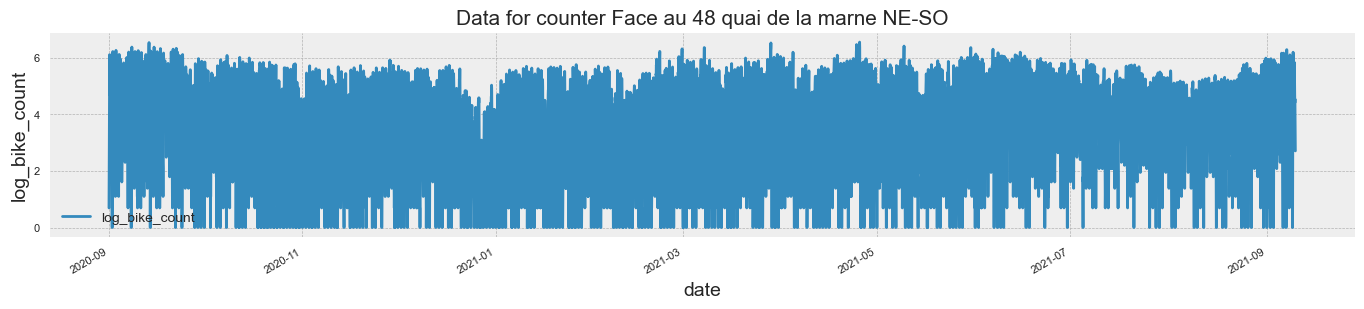

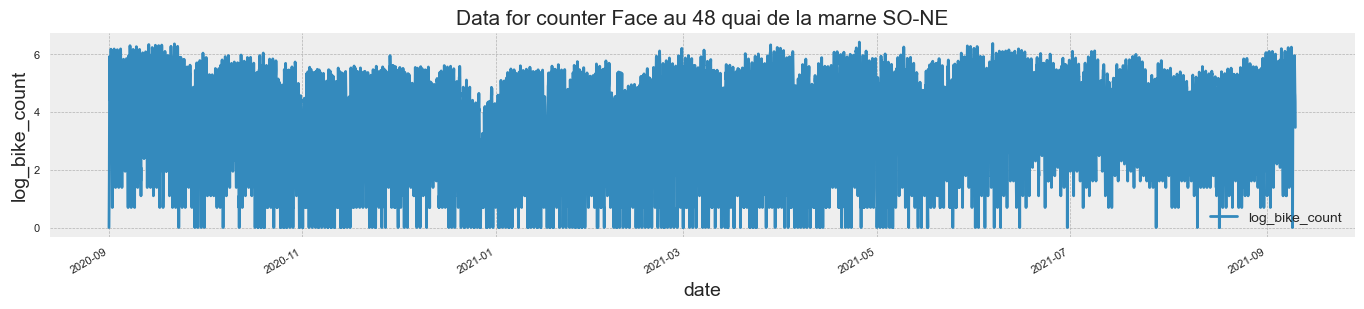

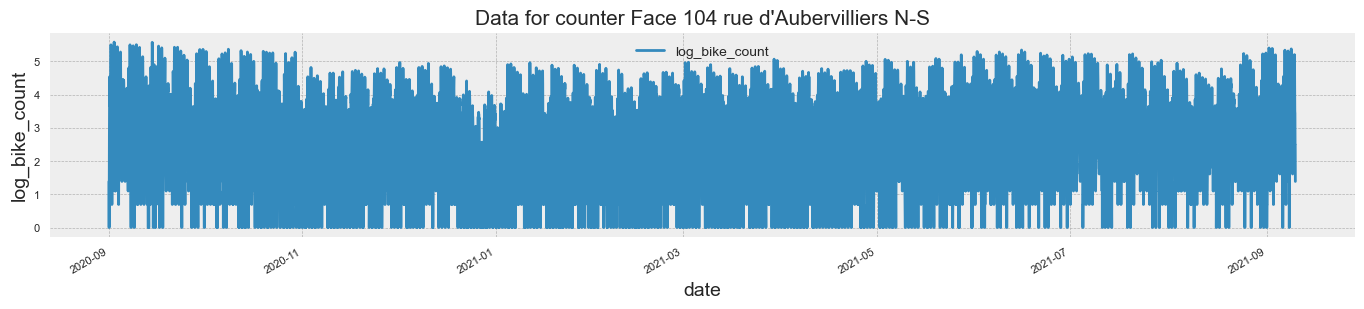

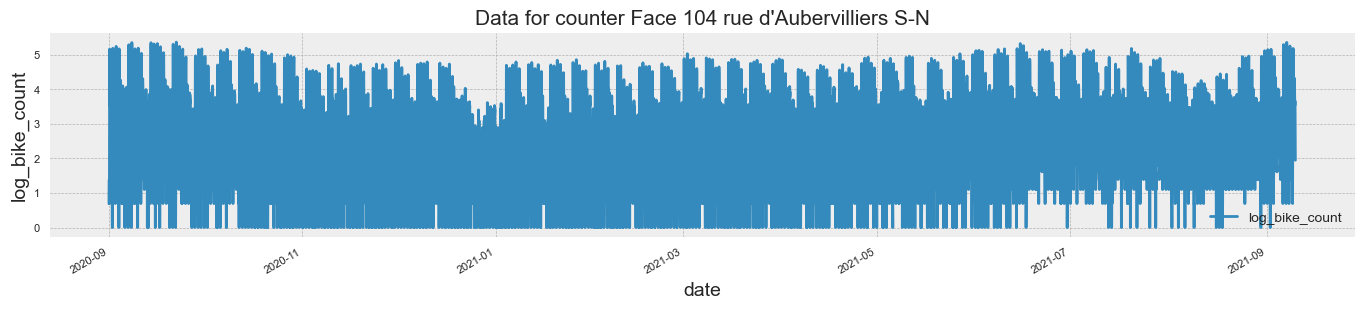

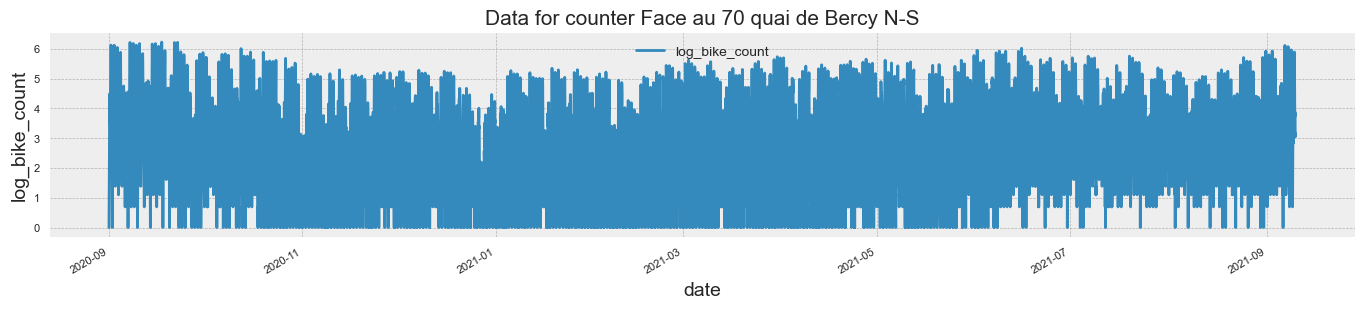

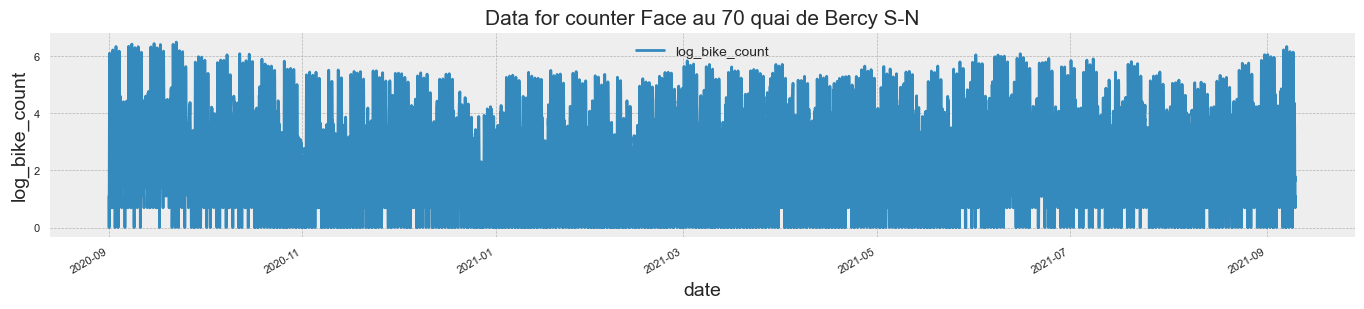

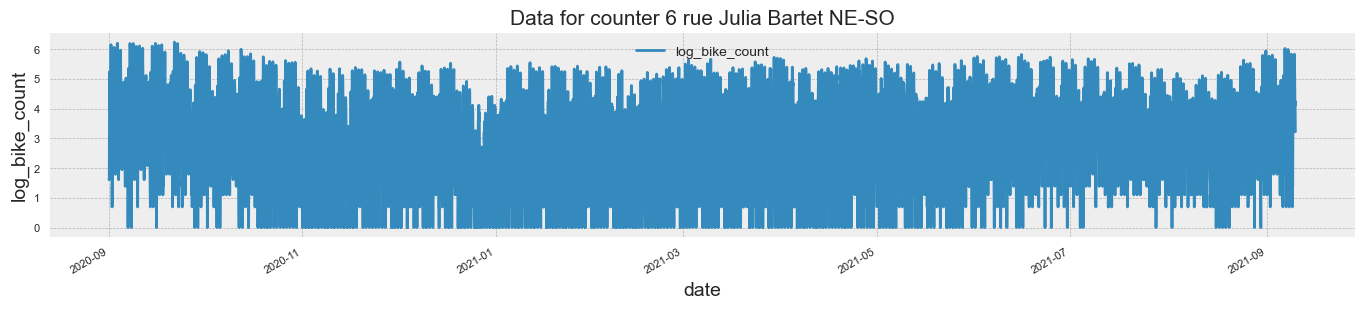

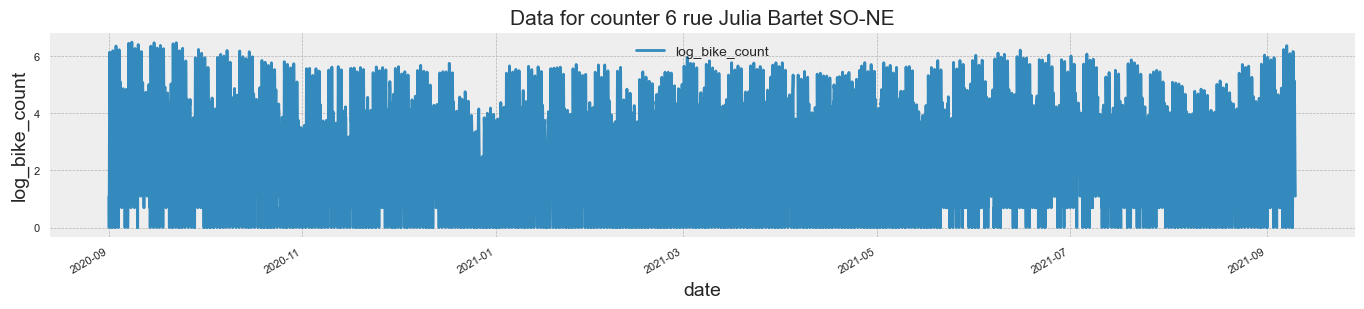

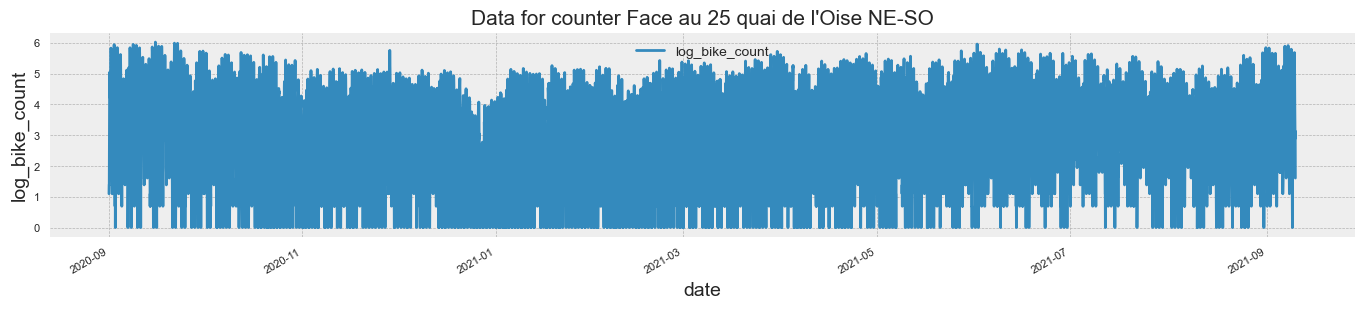

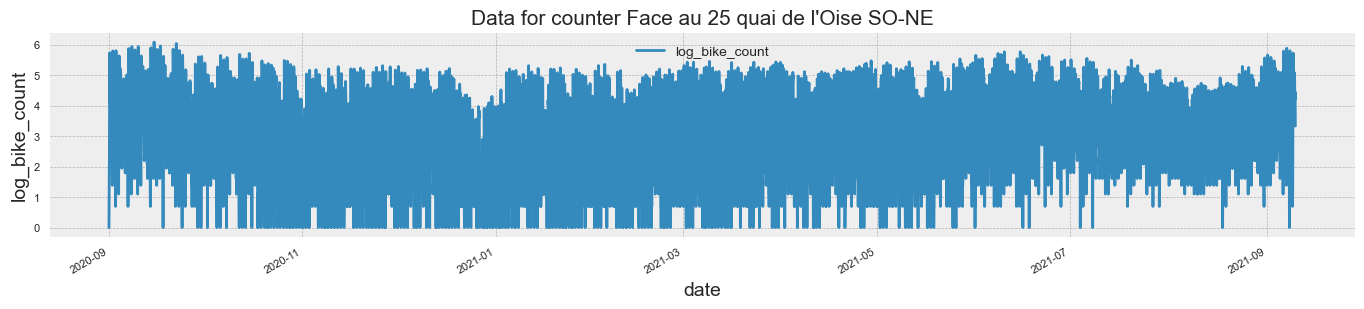

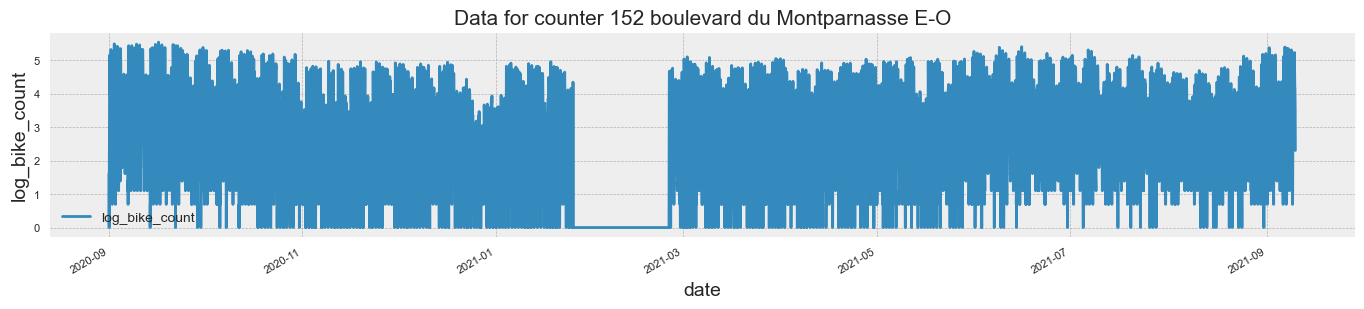

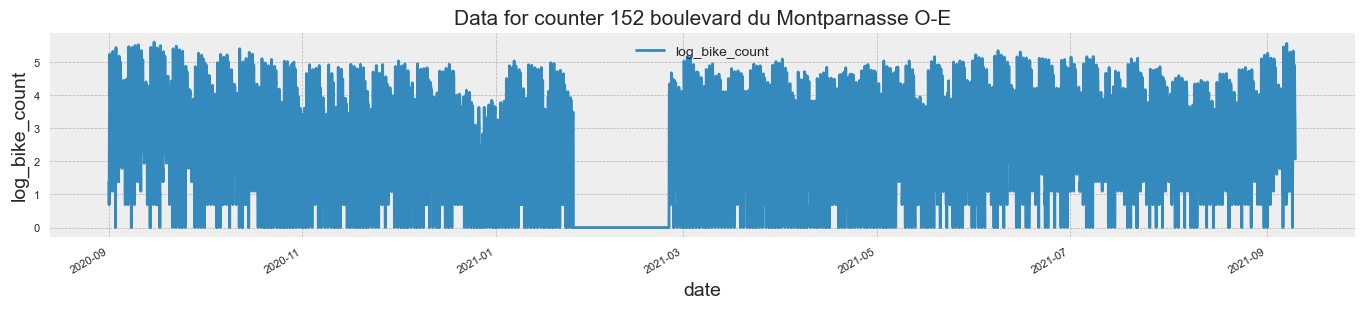

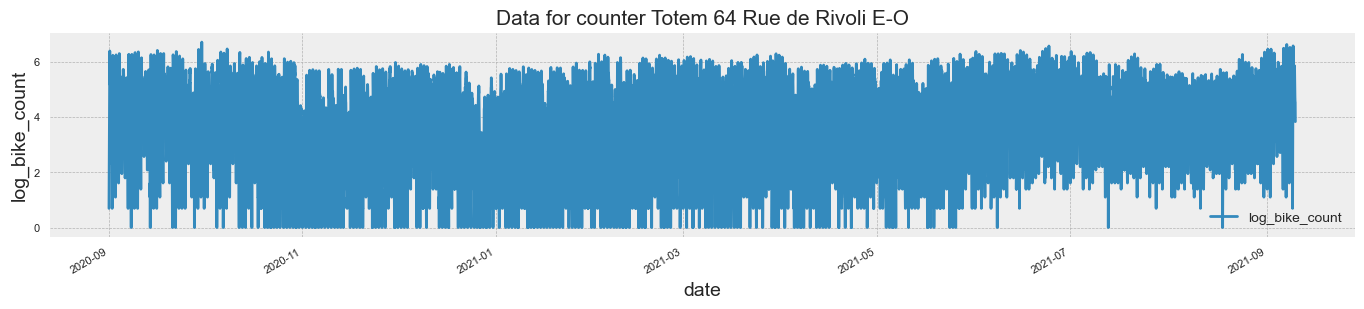

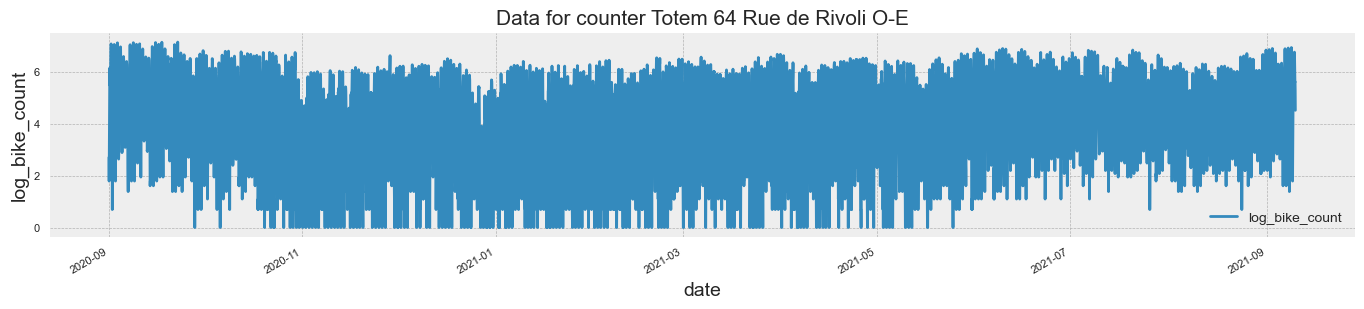

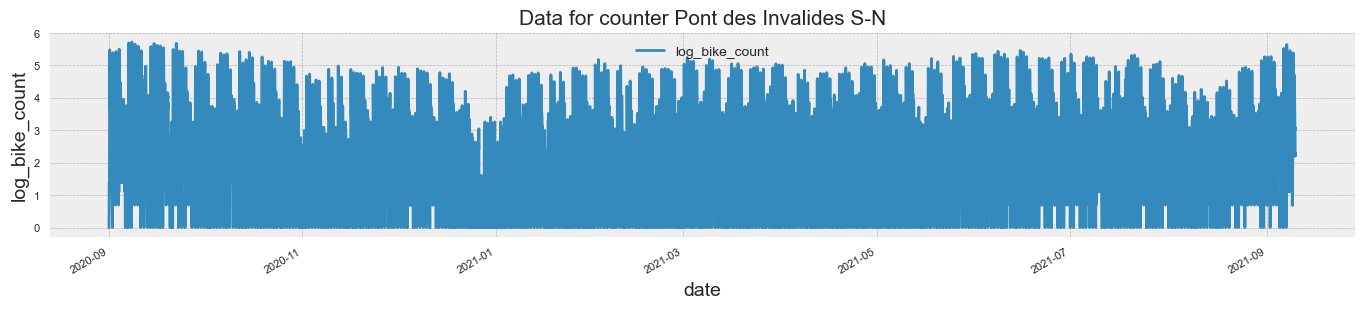

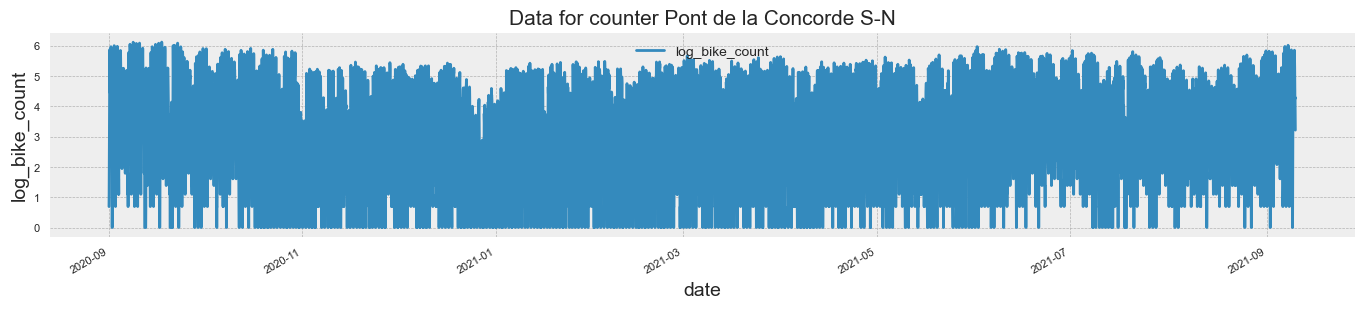

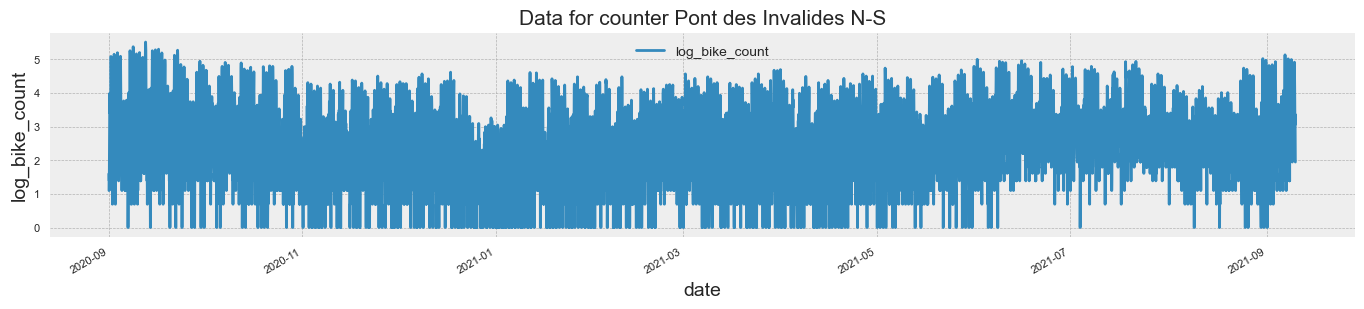

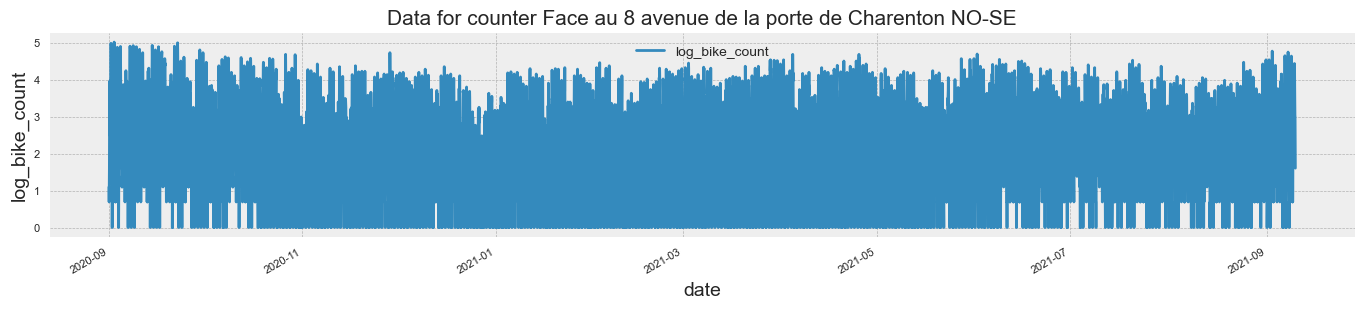

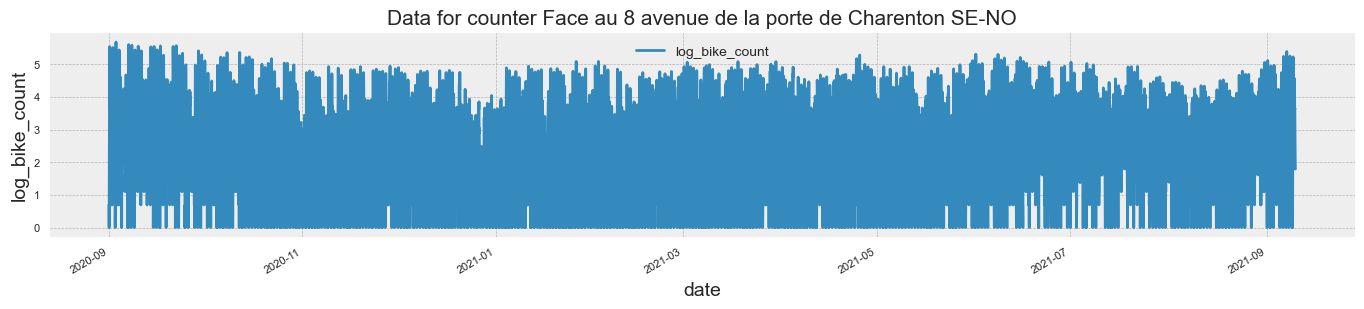

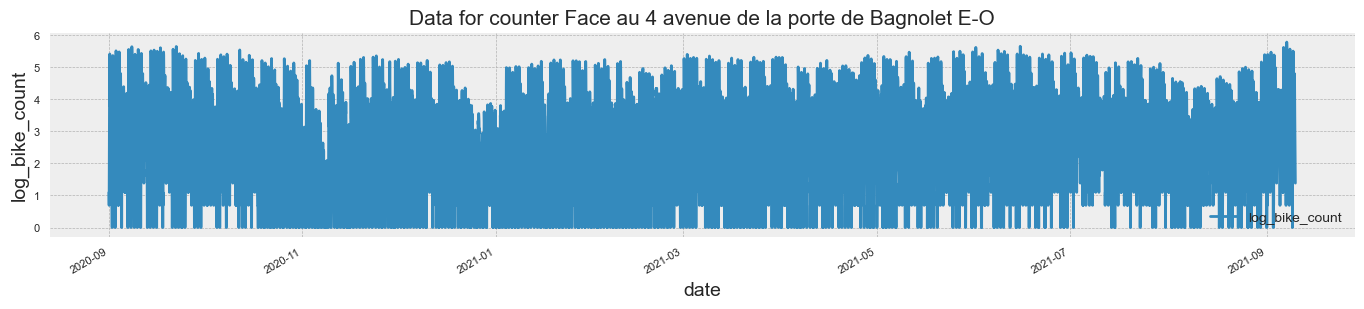

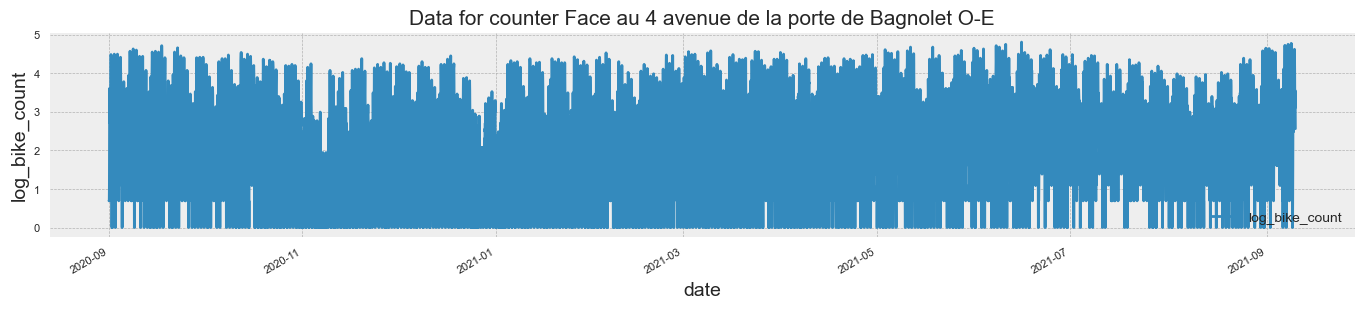

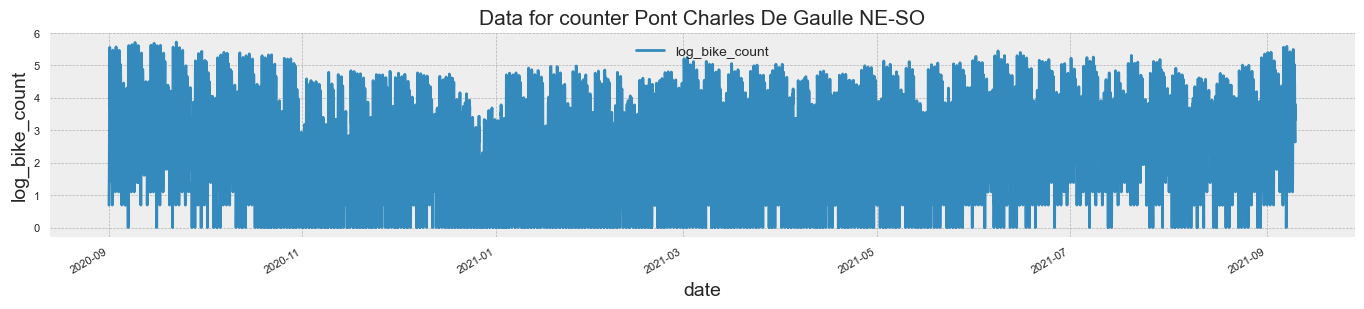

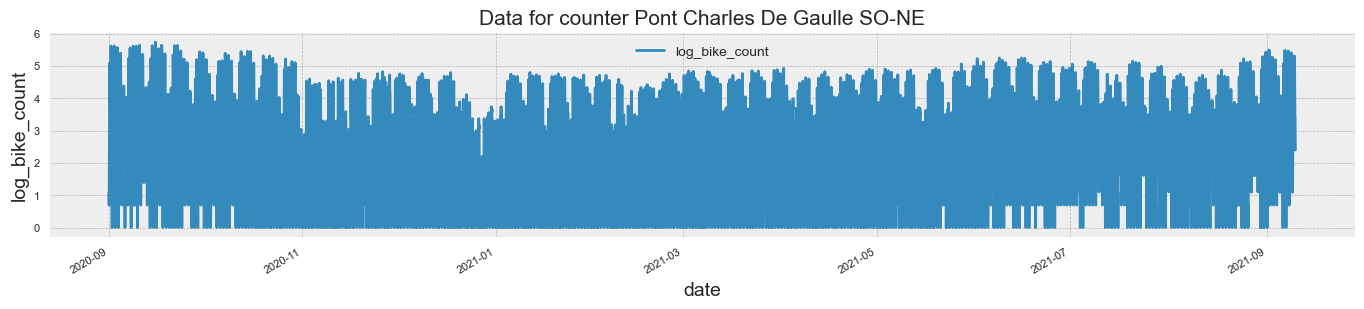

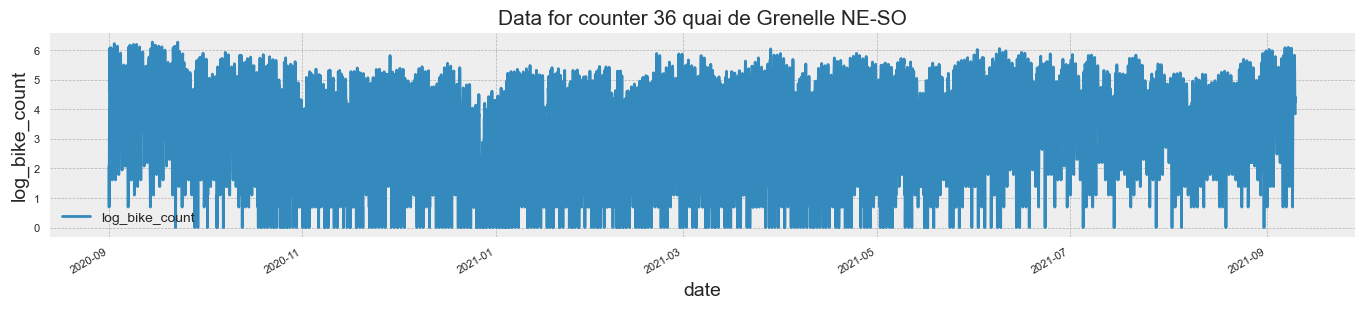

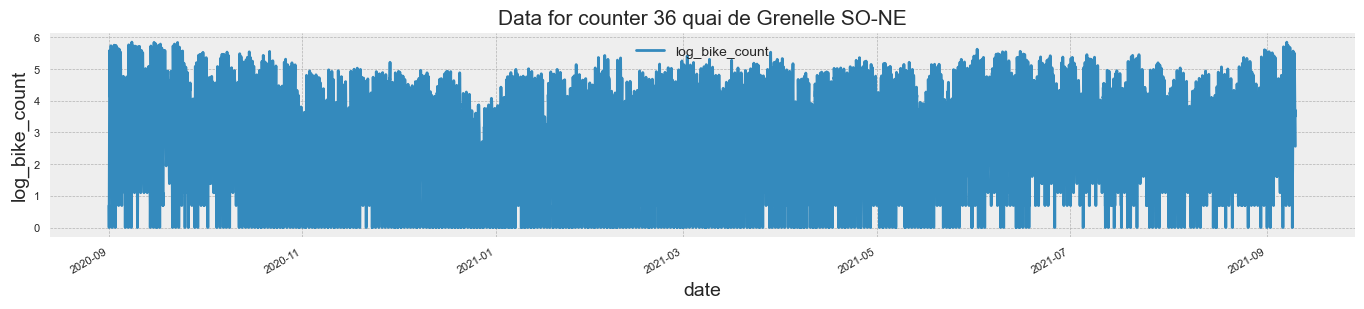

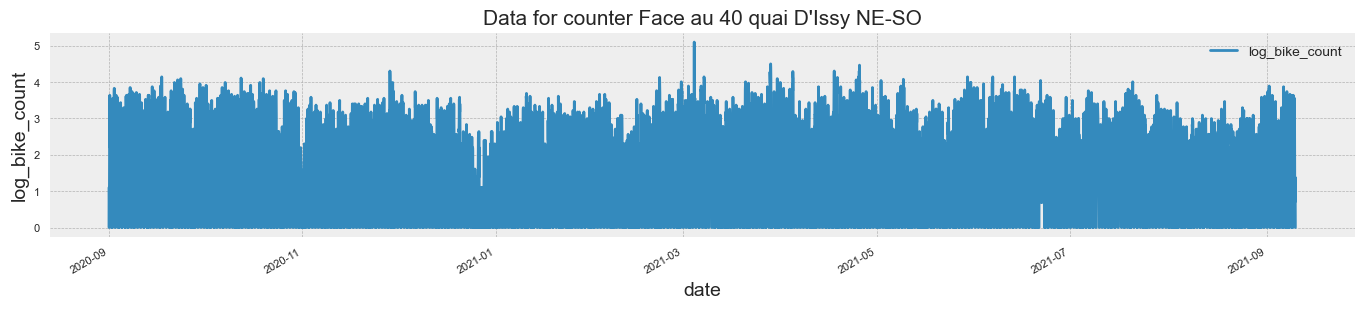

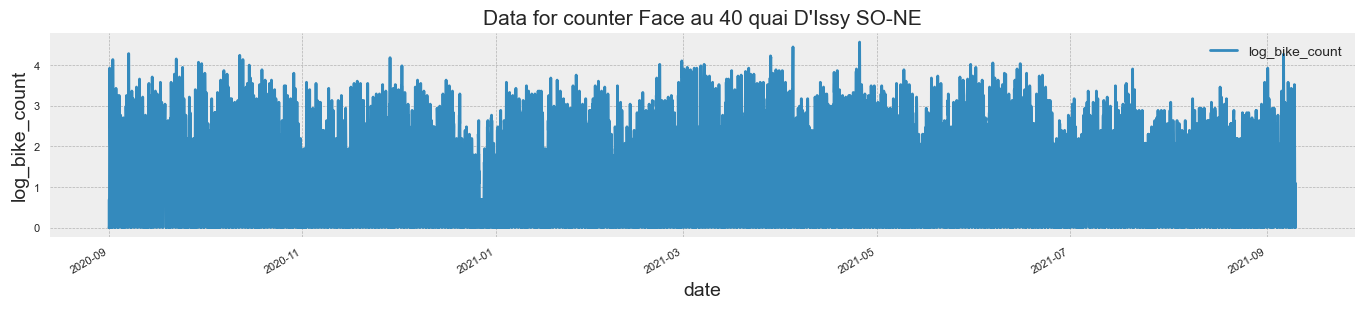

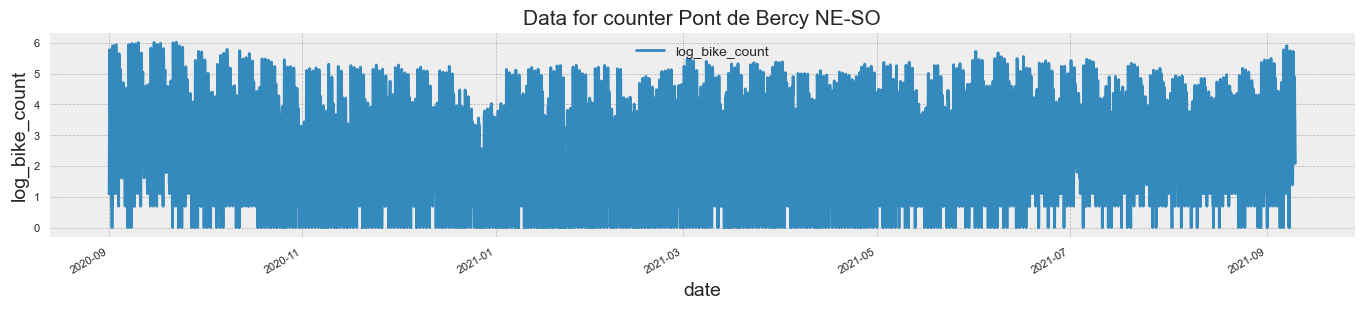

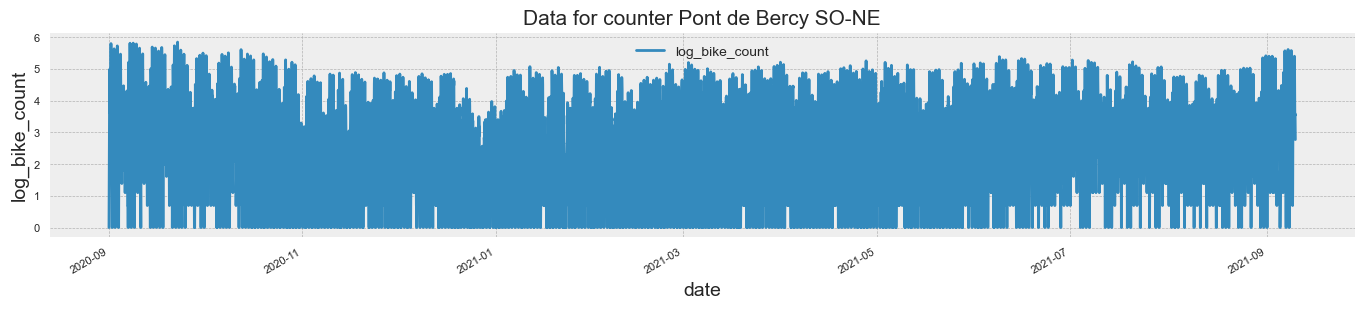

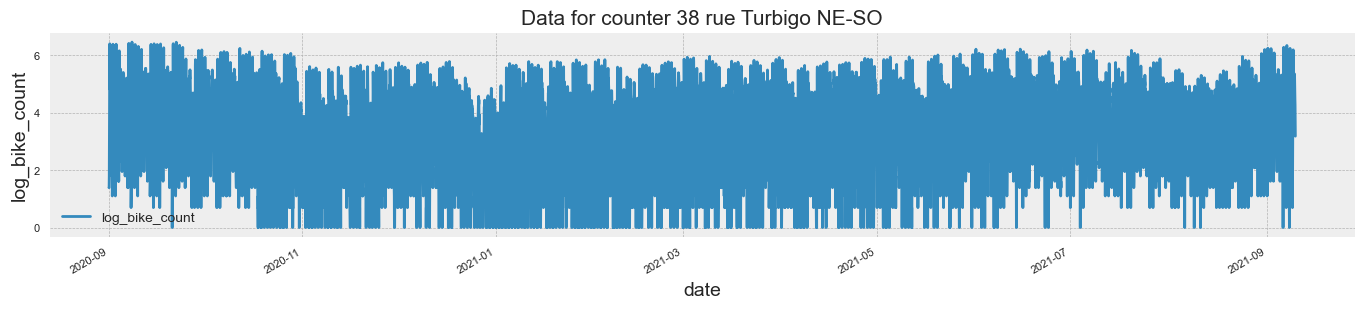

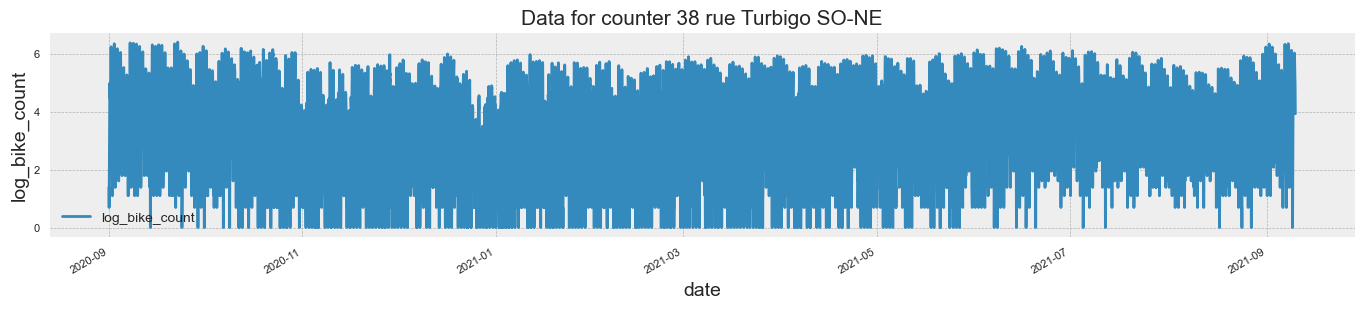

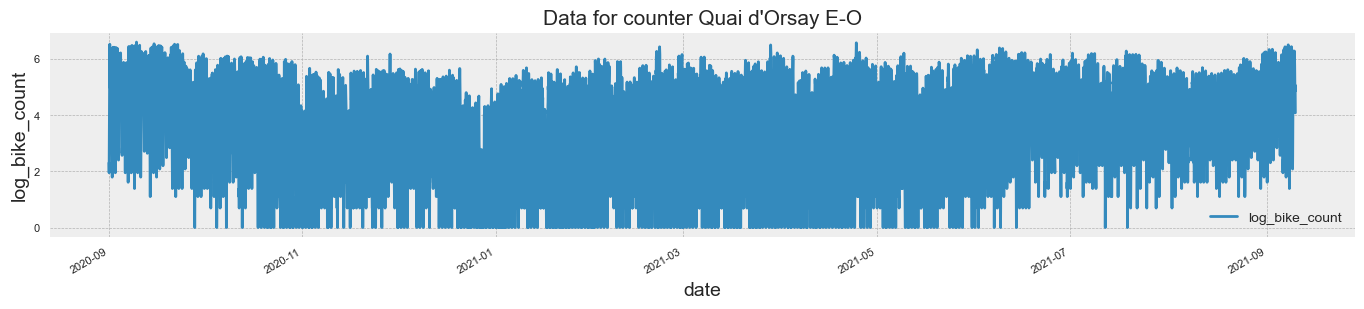

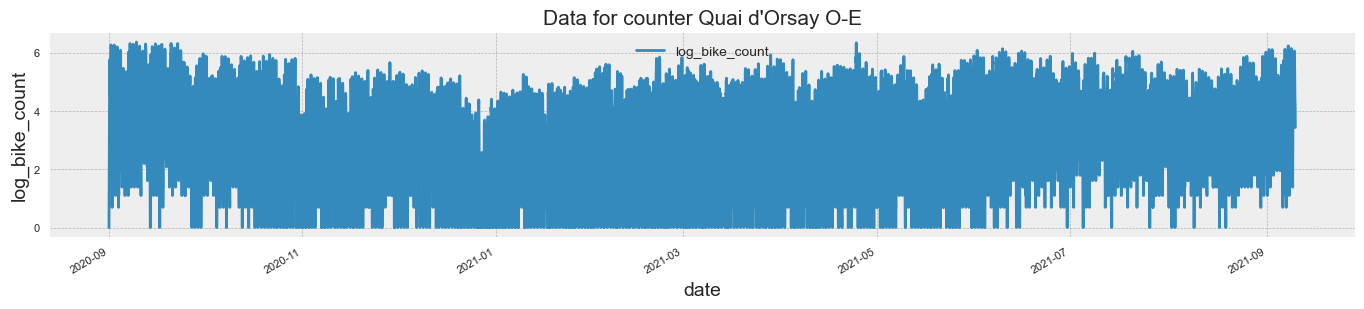

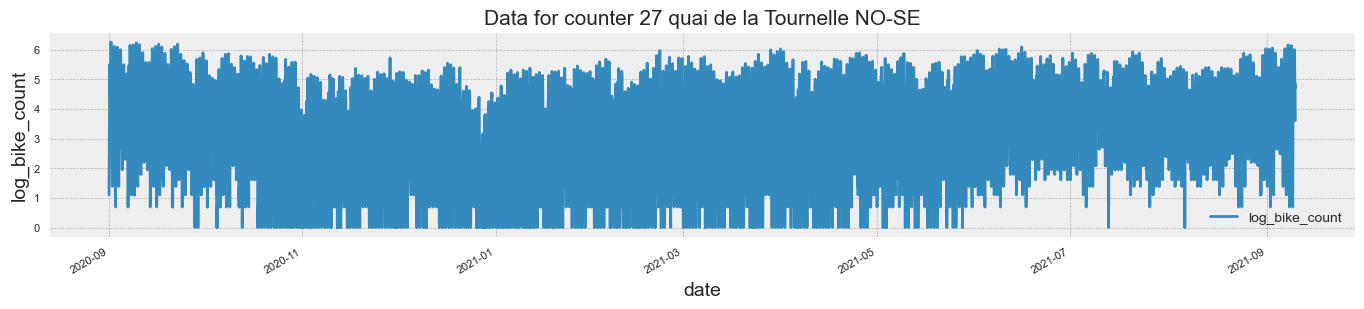

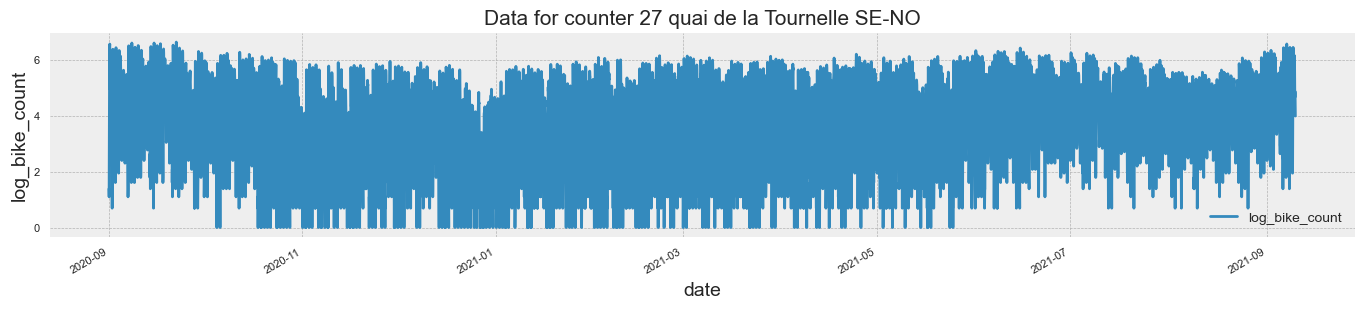

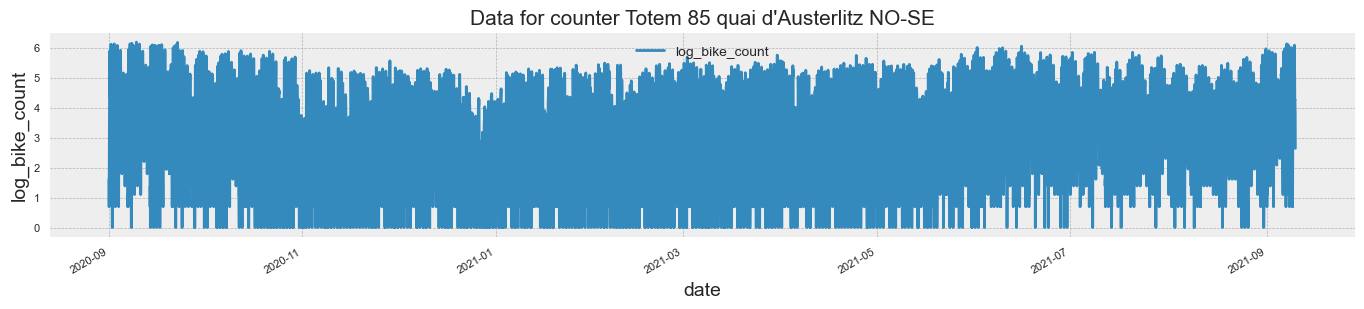

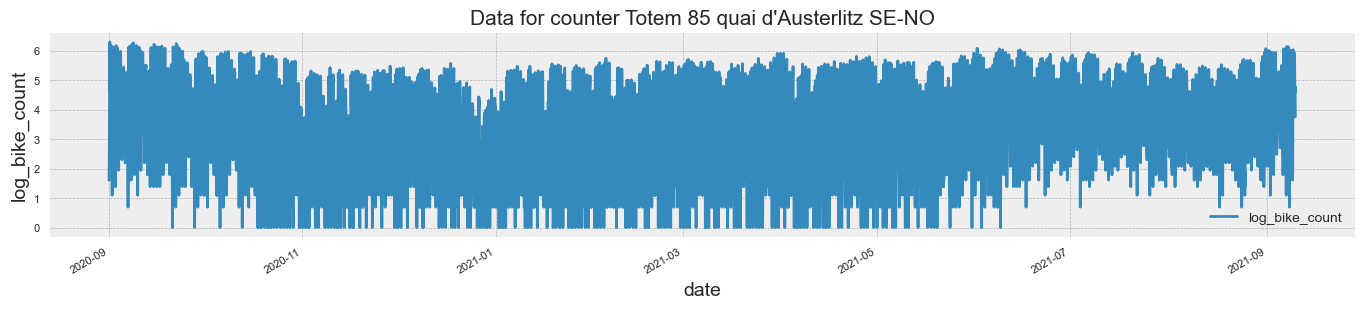

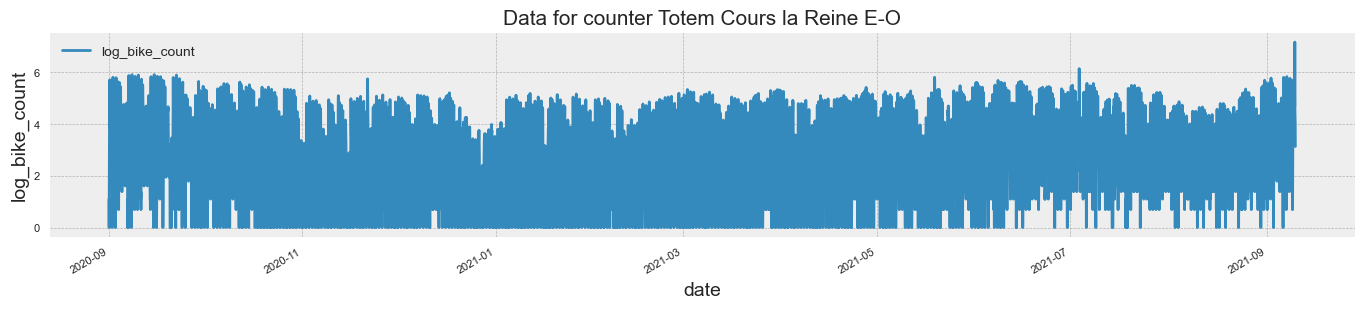

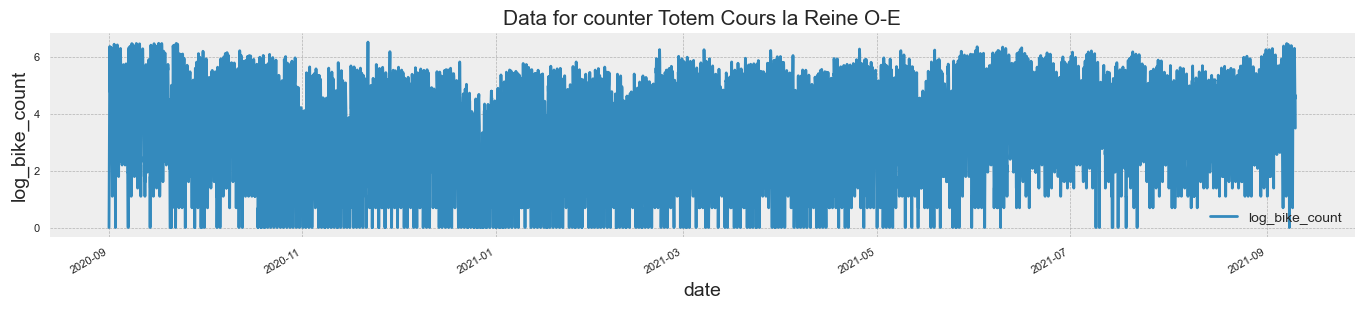

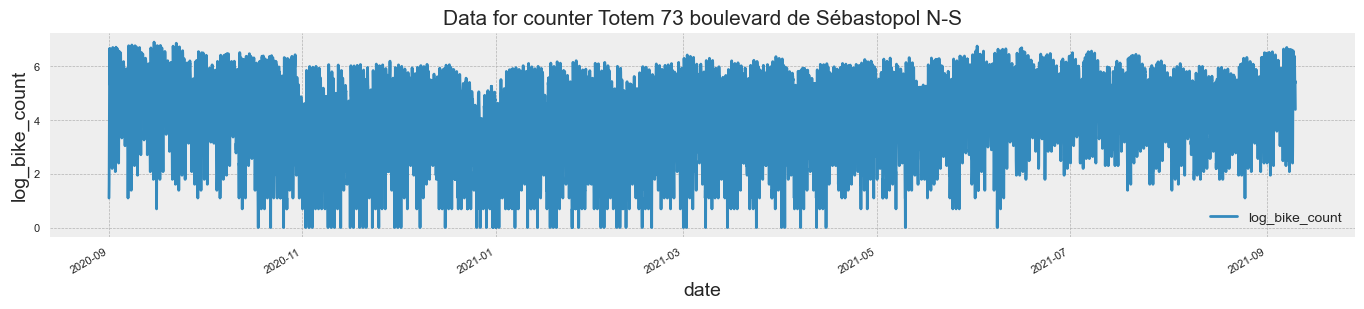

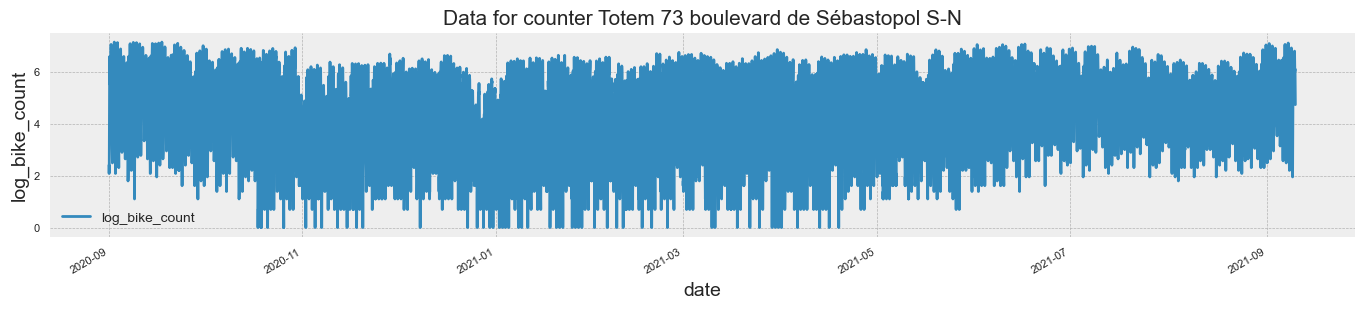

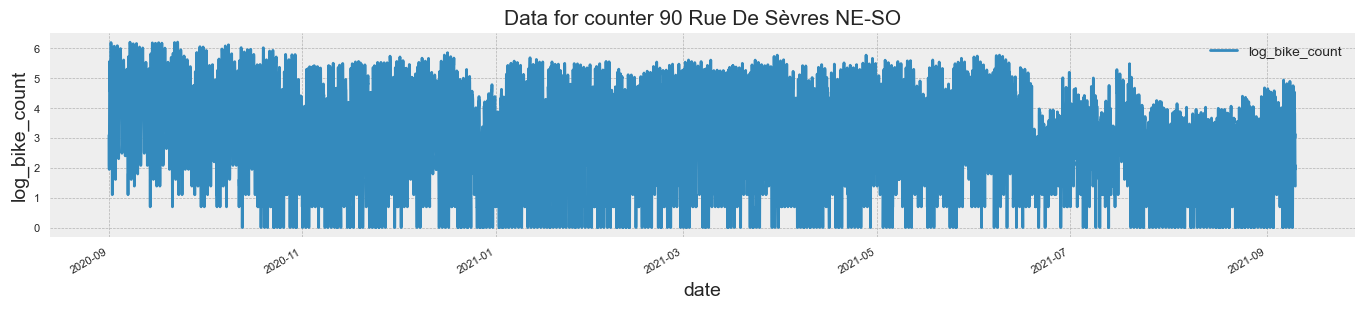

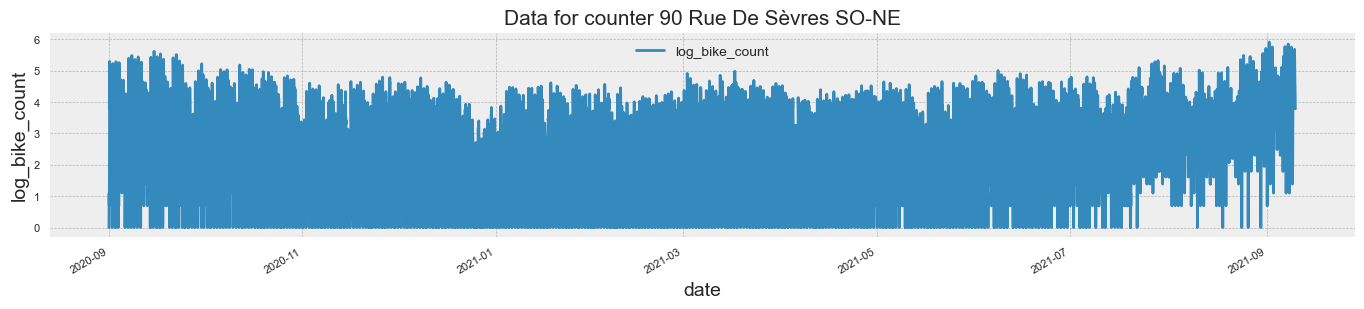

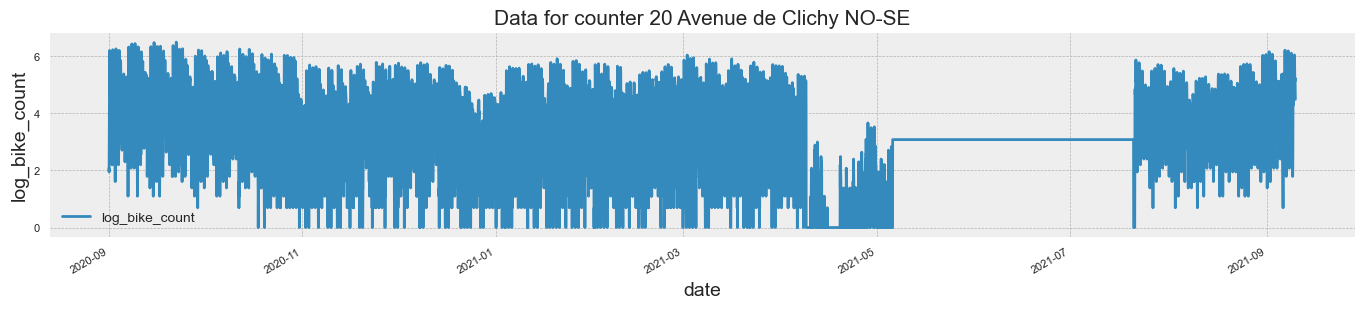

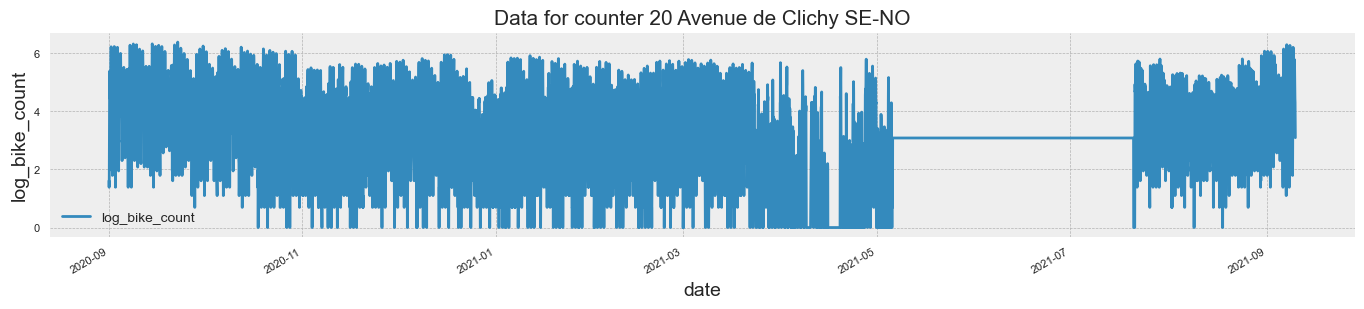

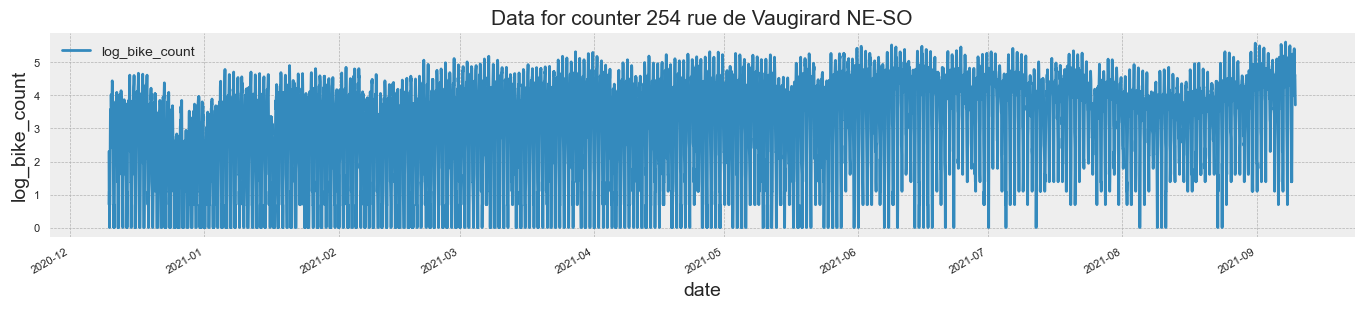

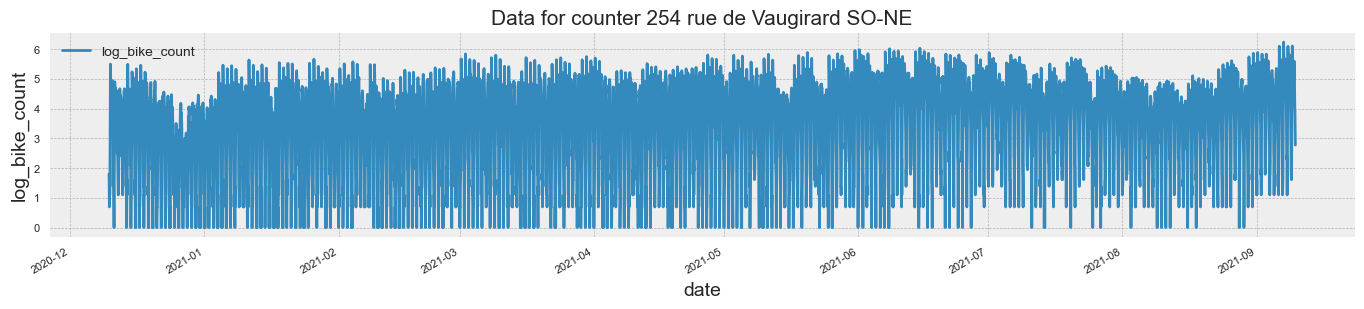

In [116]:
start_date = pd.to_datetime("2020/09/01")
end_date = pd.to_datetime("2021/09/10")

for n in data["counter_name"].unique():
    mask = (
        (data["counter_name"] == n)
        & (data["date"] >= start_date)
        & (data["date"] <= end_date)
    )

    fig, ax = plt.subplots(figsize=(15, 3))

    data.loc[mask].plot(x="date", y="log_bike_count", ax=ax)
    ax.set_title(f"Data for counter {n}", fontsize=15)
    ax.set_ylabel("log_bike_count")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()